### Nama: Jonathan Calvin Limawal
### Kode Peserta: PYTN-KS16-019
### Track: Data Science

## Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from wordcloud import WordCloud, STOPWORDS
from geopy.geocoders import Nominatim
%matplotlib inline

## Dataset

In [2]:
data = pd.read_csv("london_crime_by_lsoa.csv")
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Data Preprocessing

In [7]:
data.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
duplicate_data = data[data.duplicated()]
duplicate_data

,lsoa_code,borough,major_category,minor_category,value,year,month


In [9]:
data['major_category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [10]:
data['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

## Data Visualization - EDA

### 1. Area Chart

**Pertanyaan:**
Berapa jumlah crime pada wilayah-wilayah yang ada di London dari tahun ke tahun? (Sebutkan jumlah untuk Top 5 wilayah dengan jumlah crime (kumulatif) terbanyak)

**Hipotesis:**
Jumlah crime pada Top 5 wilayah dengan crime terbanyak sekitar 30.000 dari tahun ke tahun

In [76]:
top5_boroughs = data.groupby('borough')['value'].sum().nlargest(5).reset_index(name='Sum Value')
top5_borough_names = top5_boroughs['borough'].tolist()
top5_borough_names

['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']

In [77]:
filtered_data = data[data['borough'].isin(top5_borough_names)]
filtered_data

,lsoa_code,borough,major_category,minor_category,value,year,month
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
11,E01003076,Lambeth,Violence Against the Person,Other violence,0,2015,4
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
39,E01003947,Southwark,Drugs,Possession Of Drugs,0,2015,3
...,...,...,...,...,...,...,...
13490561,E01003605,Newham,Other Notifiable Offences,Other Notifiable,0,2015,7
13490565,E01004742,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2016,9
13490567,E01004071,Southwark,Theft and Handling,Motor Vehicle Interference & Tampering,0,2008,6
13490575,E01004020,Southwark,Fraud or Forgery,Other Fraud & Forgery,0,2014,12


In [78]:
pivot_df = filtered_data.groupby(['borough', 'year'])['value'].sum().unstack()
pivot_df.T

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


Text(0.5, 1.0, 'Area Plot of Crime Count by Year (Top 5 Borough)')

<Figure size 1000x600 with 0 Axes>

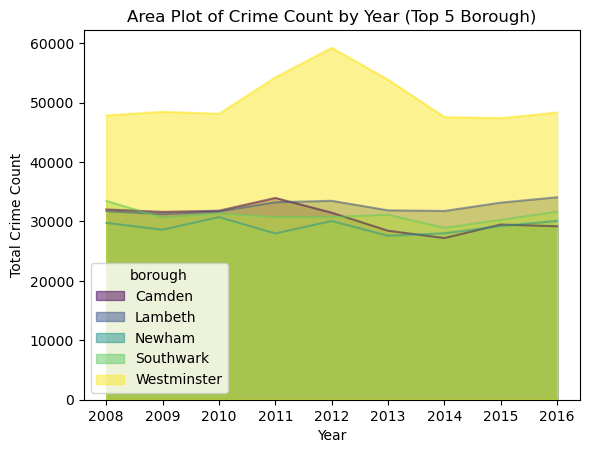

In [79]:
pivot_df = filtered_data.groupby(['borough', 'year'])['value'].sum().unstack()
plt.figure(figsize=(10, 6))  

pivot_df.T.plot(kind='area', stacked=False, colormap='viridis')

plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Area Plot of Crime Count by Year (Top 5 Borough)')

**Kesimpulan:**

Berdasarkan grafik di atas, jumlah crime pada 4 dari 5 wilayah dengan crime terbanyak terbukti sekitar 30.000 dari tahun ke tahun. Ada 1 wilayah (Westminster) yang memiliki jumlah crime sekitar 50.000 dari tahun ke tahun.

Top 5 Wilayah (Borough) dengan jumlah crime terbanyak dari tahun ke tahun:
1. Westminster
2. Southwark
3. Camden
4. Lambeth
5. Newham

### 2. Histogram

**Pertanyaan:**
Apakah ada perbedaan yang signifikan dalam distribusi jumlah kejahatan pada bulan yang berbeda? 

**Hipotesis:**
Distribusi jumlah kejahatan pada bulan yang berbeda cenderung hampir sama.

In [51]:
data['value'].value_counts()

0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: value, Length: 247, dtype: int64

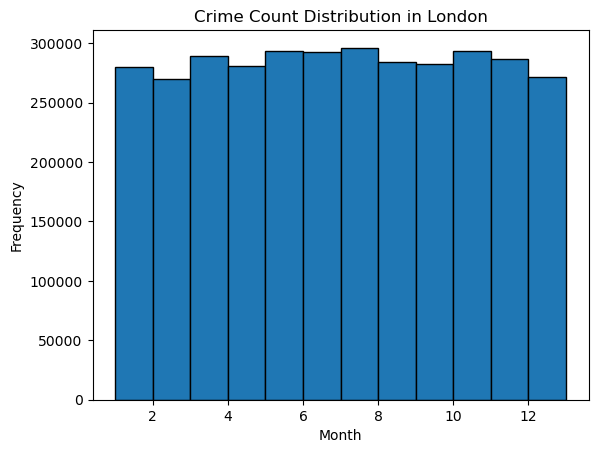

In [27]:
filtered_data = data[data['value'] != 0]

plt.hist(filtered_data['month'], bins=range(1, 14), edgecolor='k')
plt.title('Crime Count Distribution in London')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

**Kesimpulan:**

Berdasarkan grafik di atas, terlihat bahwa tidak ada perbedaan yang  signifikan pada distribusi jumlah kejahatan pada bulan yang berbeda tersebut.

### 3. Bar Chart and Line Chart

**Pertanyaan:**
Bagaimana tren kasus kejahatan (crime) di London dari tahun ke tahun?

**Hipotesis:**
Tren kasus kejahatan (crime) di London cenderung fluktuatif dari tahun ke tahun.

In [15]:
crime_trend = data.groupby('year')['value'].sum()
crime_trend

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

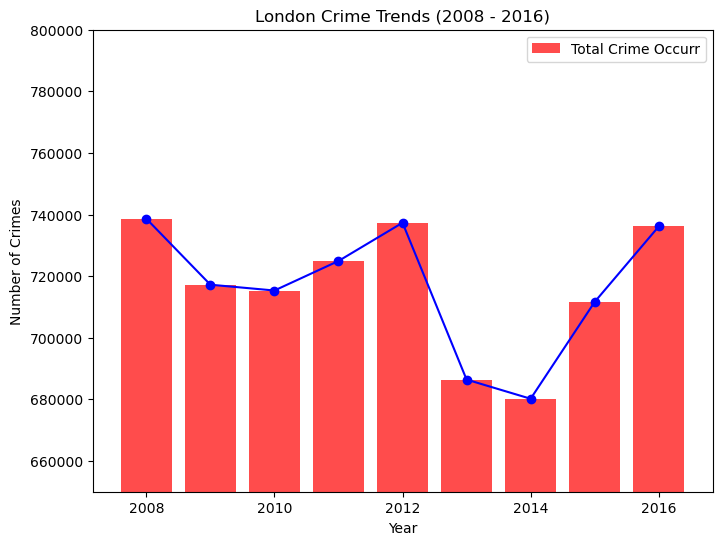

In [16]:
plt.figure(figsize=(8, 6))  

plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-', color='b')
plt.bar(crime_trend.index, crime_trend.values, color='r', alpha=0.7, label='Total Crime Occurr')

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('London Crime Trends (2008 - 2016)')
plt.ylim(650000, 800000)

plt.legend()
plt.grid(False)
plt.show()

**Kesimpulan:**

Berdasarkan grafik di atas, terlihat bahwa tren kasus kejahatan (crime) di London cenderung fluktuatif dari tahun ke tahun.

### 4. Pie Chart

**Pertanyaan:**
Jenis kejahatan (crime) apakah yang paling banyak dan paling sedikit terjadi di London?

**Hipotesis:**
Jenis kejahatan yang paling banyak terjadi di London adalah "Drugs", sedangkan yang paling sedikit adalah "Criminal Damage".

In [17]:
crime_proportion = data.groupby('major_category')['value'].sum()
crime_proportion_df = pd.DataFrame(crime_proportion)

crime_proportion_df.reset_index(inplace=True)
crime_proportion_df.columns = ['major_category', 'total_value']

crime_proportion_df

,major_category,total_value
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


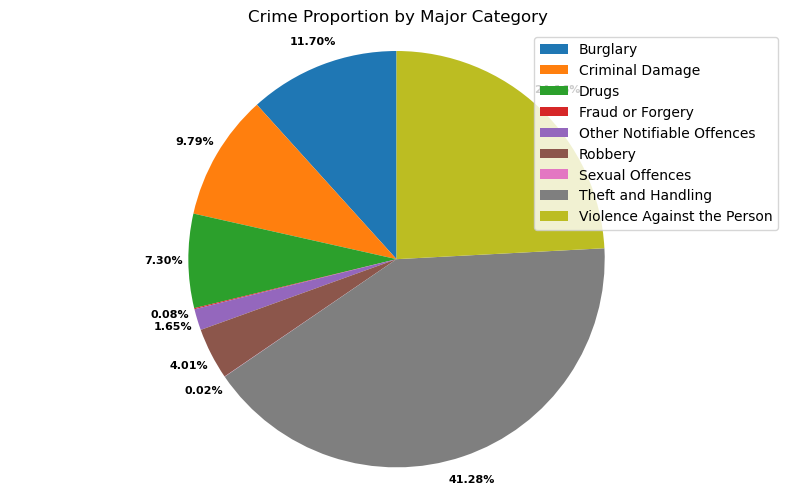

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']


plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    crime_proportion_df['total_value'],
    autopct='%1.2f%%',
    startangle=90,
    pctdistance=1.12, 
)

for autotext in autotexts:
    autotext.set(size=8, weight='bold')
    
plt.legend(crime_proportion_df['major_category'], loc='upper right')

plt.title('Crime Proportion by Major Category')
plt.axis('equal') 

plt.show()


**Kesimpulan:**

Berdasarkan grafik di atas, terlihat bahwa:
* Jenis kejahatan yang paling banyak terjadi di London adalah "Theft and Handling".
* Jenis kejahatan yang paling sedikit terjadi di London adalah "Sexual Offences".

### 5. Box Plot

**Pertanyaan:**
Apakah ada perbedaan yang signifikan dalam distribusi jumlah kejahatan di antara wilayah yang berbeda? (Dalam hal ini, 3 wilayah dengan jumlah kejahatan paling rendah)?

**Hipotesis:**
Distribusi jumlah kejahatan di antara wilayah yang berbeda cenderung hampir sama.

In [86]:
last3_boroughs = data.groupby('borough')['value'].sum().nsmallest(3).reset_index(name='Sum Value')
last3_boroughs = last3_boroughs['borough'].tolist()
last3_boroughs

['City of London', 'Kingston upon Thames', 'Richmond upon Thames']

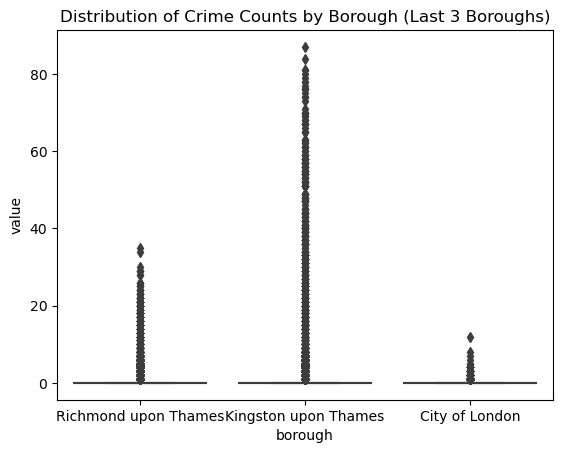

In [88]:
filtered_data = data[data['borough'].isin(last3_boroughs)]

sns.boxplot(x='borough', y='value', data=filtered_data)
plt.title('Distribution of Crime Counts by Borough (Last 3 Boroughs)')
plt.show()

**Kesimpulan:**

Berdasarkan grafik di atas, terlihat bahwa tidak ada perbedaan yang  signifikan pada distribusi jumlah kejahatan pada 3 wilayah tersebut. Rata-rata jumlah kejahaan yang dilaporkan berada di nilai 0.

### 6. Scatter Plot

**Pertanyaan:**
Apakah ada hubungan atau korelasi antara waktu (dalam hal ini adalah tahun + bulan) dan jumlah (count) crime di London?

**Hipotesis:**
Ada hubungan atau korelasi antara waktu (dalam hal ini adalah tahun + bulan) dan jumlah (count) crime di London?

In [48]:
filtered_data = data[data['value'] != 0]
year_month_sum = filtered_data.groupby(['month','year'])['value'].sum().reset_index()
year_month_sum

,month,year,value
0,1,2008,65419
1,1,2009,59142
2,1,2010,54934
3,1,2011,57966
4,1,2012,62436
...,...,...,...
103,12,2012,58618
104,12,2013,54209
105,12,2014,57565
106,12,2015,60840


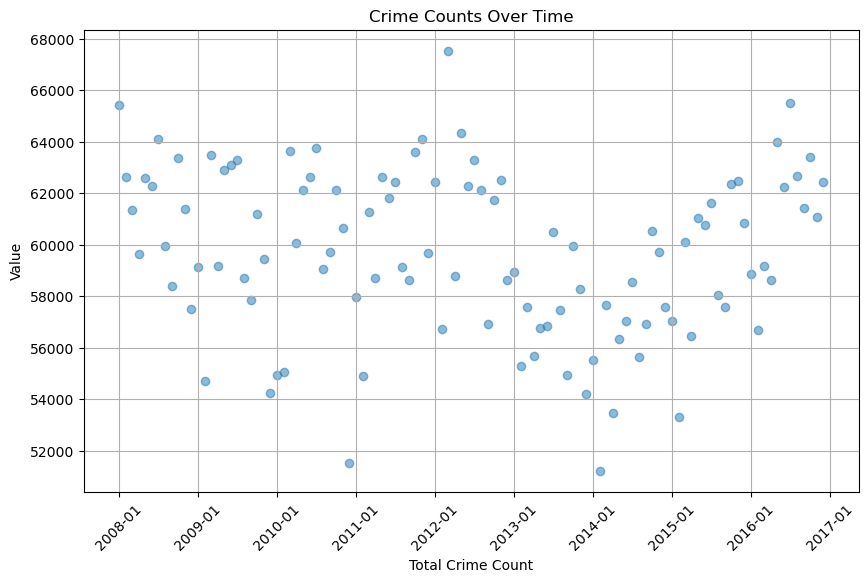

In [51]:
year_month_sum['year_month'] = pd.to_datetime(year_month_sum['year'].astype(str) + year_month_sum['month'].astype(str), format='%Y%m')

# Create a scatter plot of "year_month" vs. "value"
plt.figure(figsize=(10, 6))
plt.scatter(year_month_sum['year_month'], year_month_sum['value'], alpha=0.5)
plt.title('Crime Counts Over Time')
plt.xlabel('Total Crime Count')
plt.ylabel('Value')

# Format the x-axis to display year and month labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Optional: Display grid lines

plt.show()

**Kesimpulan:**

Berdasarkan grafik di atas, terlihat bahwa tidak bentuk yang khusus (spesial), misalnya garis lurus, pada grafik di atas. Oleh karena itu, dapat disimpulkan bahwa tidak ada hubungan atau korelasi antara waktu (dalam hal ini adalah tahun + bulan) dan jumlah (count) crime di London.

### 7. Word Clouds

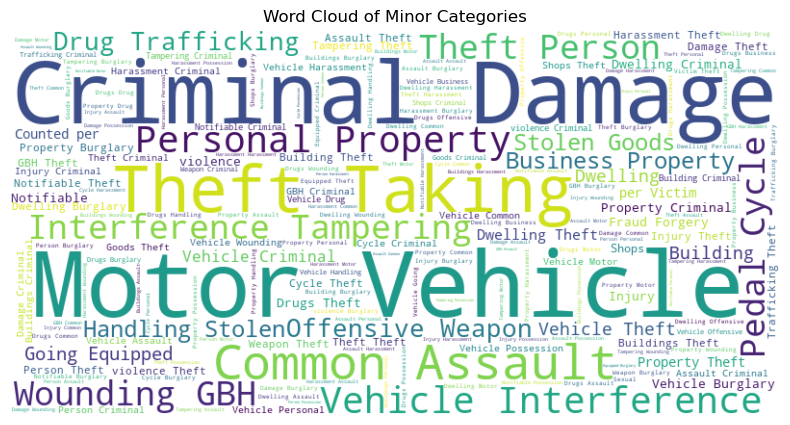

In [35]:
text = ' '.join(data['minor_category'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Minor Categories')
plt.show()

### 8. Folium Maps

In [72]:
selected_boroughs = ['Camden', 'Lambeth', 'Newham', 'Southwark', 'Westminster', 'Croydon', 'Greenwich', 'Bromley', 
                     'Redbridge', 'Wandsworth', 'Ealing', 'Hounslow', 'Sutton', 'Haringey']

filtered_data = data[data['borough'].isin(selected_boroughs)]

In [74]:
from folium import plugins

london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

borough_markers = plugins.MarkerCluster().add_to(london_map)

coordinates = {
    'Camden': [51.5406, -0.14331],
    'Lambeth': [51.4167, -0.13332],
    'Newham': [51.52551620, 0.035216303],
    'Southwark': [51.494720, -0.1352784],
    'Westminster': [51.494720, -0.1352785],
    'Croydon': [51.376495, -0.100594],
    'Greenwich': [51.4825766, -0.0076589],
    'Bromley': [51.4060600, 0.0151900],
    'Redbridge': [51.58861210, 0.08239820],
    'Wandsworth': [51.4544, -0.1902],
    'Ealing': [51.52503660, -0.34139650],
    'Hounslow': [51.48283580, -0.38820620],
    'Sutton': [51.3584, -0.1926],
    'Haringey': [51.6016, -0.1129]
}

for borough, coords in coordinates.items():
    lat, lon = coords
    folium.Marker(
        location=[lat, lon],
        popup=borough,
    ).add_to(borough_markers)

london_map

### Overall Analysis

Pertama, tren kasus kejahatan (crime) di London cenderung fluktuatif dari tahun ke tahun. Kemudian, ditemukan bahwa lima wilayah (borough) dengan jumlah crime terbanyak dari tahun ke tahun adalah Westminster, Southwark, Camden, Lambeth, dan Newham. Selanjutnya, ditemukan juga bahwa jenis kejahatan yang paling banyak terjadi di London adalah "Theft and Handling".

Oleh karena itu, jika dapat memberi saran, saya menyarankan pemerintah/polisi di London untuk fokus memperketat pengamanan di 5 wilayah tersebut dan memasang lebih banyak CCTV untuk mencegah kasus kejahatan "Theft and Handling".